#Importing Package

In [1]:
# Essentials
import numpy as np
import pandas as pd

# Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Misc
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

##Importing Dataset

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#Data Cleaning

In [3]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [4]:
df.shape

(319795, 18)

We have 319,795 rows and 18 columns. The columns represent various characteristics of each unit, and is described as follows.

1. **HeartDisease**  : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)(Yes, No)
2. **BMI** : Body Mass Index (BMI)
3. **Smoking** : Have smoked at least 100 cigarettes (Yes, No)
4. **AlcoholDrinking** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (Yes, No)
5. **Stroke** : Respondents ever told had a stroke (Yes, No)
6. **PhysicalHealth** : The days respondent have physical health not good (0-30 days)
7. **MentalHealth** : The days respondent have mental health not good (0-30 days)
8. **DiffWalking** : Have serious problem with walking or climbing stairs (Yes, No)
9. **Sex** : Male or female
10. **AgeCategory** : Fourteen-level age category (from 18 y.o - older)
11. **Race** :Type of race
12. **Diabetic** : Diabet status (No, Yes, No(borderline diabetes), Yes(during pregnancy))
13. **PhysicalActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (Yes, No)
14. **GenHealth** : Respondent general health (Very good, Good, Excellent, Fair, Poor)
15. **SleepTime**  On average, how many hours of sleep in a 24-hour period
16. **Asthma** : Respondents ever told had a asthma (Yes, No)
17. **KidneyDisease** :Respondents ever told had a kidney disease exclude kidney stones, bladder infection or incontinence (Yes, No)
18. **SkinCancer** : Respondents ever told had a skin cancer (Yes, No)



In [5]:
#Check missing values
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
df.duplicated().sum()

18078

There are 18078 duplicated data from 319,795. This duplicated data can be dropped immediately because only 5,6% of the total data.

In [7]:
df = df.drop_duplicates()
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


#Statistical Summary

In [8]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Sex', 'AgeCategory', 
                'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

numericals = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [9]:
# numerical statistical sumary
df[numericals].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,301717.000000,301717.000000,301717.000000,301717.000000
mean,28.441970,3.572298,4.121475,7.084559
std,6.468134,8.140656,8.128288,1.467122
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.410000,0.000000,0.000000,7.000000
75%,31.650000,2.000000,4.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


1. `BMI` and `SleepTime` columns have a normal distribution data cause min and median have almost the same value.
2. `PhysicalHealth` and `MentalHealth`have various values ​​ranging from min 0 and maxi 30. We will check whether the data is outlier or not.

In [10]:
df[categoricals].describe()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717,301717
unique,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,274456,174312,280136,289653,159671,31670,227724,251796,230412,104796,259066,289941,272425


#Outliers Data
Outliers are anomaly data, either in minimum data or maximum data. Data outliers can help us understand the data but will have an impact on unstable modeling. So the outliers data need to be handlend.

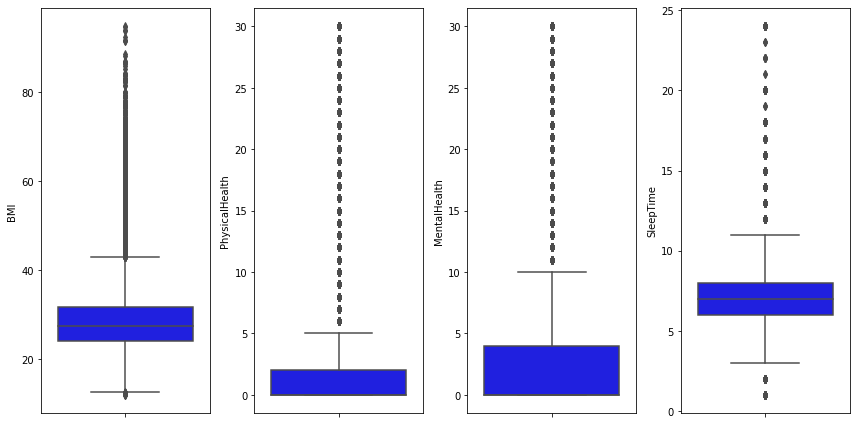

In [11]:
# Check Outliers Data in Numerical Columns
plt.figure(figsize=(12,6))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='blue')
    plt.tight_layout()

In [12]:
def detect_outliers(columns):
    outlier_indices = []
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # IQR is interquartile range.

        mask = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
        mask = mask.to_numpy()
        false_indices = np.argwhere(~mask)
        outlier_indices.append(false_indices)
    return np.unique(np.concatenate(outlier_indices).ravel())

In [13]:
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
outlier_indices = detect_outliers(numerical_columns)

print(f'Number of outliers: {len(outlier_indices)}')

Number of outliers: 79186


There are 79186 outliers in that columns and we using IQR score to handle this.

In [14]:
# Exclude outliers using IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

df[(df['BMI'] >= Lower_Whisker) & (df['BMI'] <= Upper_Whisker)]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


In [15]:
#Remove outliers 
df_clean = df[~((df['BMI'] < Lower_Whisker) | (df['BMI'] > Upper_Whisker))]
df_clean.shape

(292812, 18)

This is our clean dataset which contains 292,812 row and 18 columns.

#Check Columns Values
In this section we will convert categorical data into numerical data cause modelling prefer numerical data.

In [16]:
df_clean.Diabetic.value_counts()

No                         246049
Yes                         37874
No, borderline diabetes      6442
Yes (during pregnancy)       2447
Name: Diabetic, dtype: int64

In [17]:
df_clean.HeartDisease.value_counts()

No     266554
Yes     26258
Name: HeartDisease, dtype: int64

In [18]:
df_clean.Smoking.value_counts()

No     169201
Yes    123611
Name: Smoking, dtype: int64

In [19]:
df_clean.AlcoholDrinking.value_counts()

No     271595
Yes     21217
Name: AlcoholDrinking, dtype: int64

In [20]:
df_clean.Stroke.value_counts()

No     281156
Yes     11656
Name: Stroke, dtype: int64

In [21]:
df_clean.DiffWalking.value_counts()

No     251964
Yes     40848
Name: DiffWalking, dtype: int64

In [22]:
df_clean.DiffWalking.value_counts()

No     251964
Yes     40848
Name: DiffWalking, dtype: int64

In [23]:
df_clean.PhysicalActivity.value_counts()

Yes    225513
No      67299
Name: PhysicalActivity, dtype: int64

In [24]:
df_clean.Asthma.value_counts()

No     252498
Yes     40314
Name: Asthma, dtype: int64

In [25]:
df_clean.KidneyDisease.value_counts()

No     281615
Yes     11197
Name: KidneyDisease, dtype: int64

In [26]:
df_clean.SkinCancer.value_counts()

No     263978
Yes     28834
Name: SkinCancer, dtype: int64

In [27]:
df_clean.GenHealth.value_counts()

Very good    103188
Good          87754
Excellent     59238
Fair          32279
Poor          10353
Name: GenHealth, dtype: int64

In [28]:
df_clean.AgeCategory.value_counts()

65-69          30768
60-64          30267
70-74          28703
55-59          26640
80 or older    23218
50-54          22794
75-79          20458
18-24          19665
45-49          19618
40-44          18944
35-39          18711
30-34          17235
25-29          15791
Name: AgeCategory, dtype: int64

#Encoding Data

In [29]:
### Encoding variable
yes_no_dict = {
    'Yes':1,
    'No':0
}

for colname in ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    df_clean[colname] = df_clean[colname].map(yes_no_dict)

In [30]:
### Encoding sex
f_m_dict = {
    'Male':1,
    'Female':0
}

for colname in ['Sex']:
    df_clean[colname] = df_clean[colname].map(f_m_dict)

In [31]:
### Encoding AgeCategory
age_dict = {
    '18-24' :1,
    '25-29' :2,
    '30-34' :3,
    '35-39' :4,
    '40-44' :5,
    '45-49' :6,
    '50-54' :7,
    '55-59' :8,
    '60-64' :9,
    '65-69' :10,
    '70-74' :11,
    '75-79' :12,
    '80 or older' :13,

}

for colname in ['AgeCategory']:
    df_clean[colname] = df_clean[colname].map(age_dict)

In [32]:
### Encoding GenHealth
gen_dict = {
    'Poor' :1,
    'Fair' :2,
    'Good' :3,
    'Very good' :4,
    'Excellent' :5,
    

}

for colname in ['GenHealth']:
    df_clean[colname] = df_clean[colname].map(gen_dict)

In [33]:
# Onehot Encoding
onehot_columns = ['Race', 'Diabetic']
df_clean = pd.get_dummies(df_clean, columns = onehot_columns)

In [34]:
df_clean

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,0,8,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,0,13,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,0,5,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,22.22,0,0,0,0.0,0.0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
319790,1,27.41,1,0,0,7.0,0.0,1,1,9,...,0,0,0,1,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,4,...,0,0,0,1,0,0,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,6,...,0,0,0,1,0,0,1,0,0,0


#Feature Modelling

In [36]:
df_clean.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [37]:
x = df_clean[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)']]

y = df_clean[['HeartDisease']]

from sklearn.model_selection import train_test_split
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x, y, test_size = 0.20, random_state = 46)

In [38]:
df_clean['HeartDisease'].value_counts()

0    266554
1     26258
Name: HeartDisease, dtype: int64

Target data was imbalanced so we need to undersampling and oversampling the data.

#Undersampling Data
Undersampling is the process of equating data in minimum amount. This process is already automatic in python so we only need to input the syntax.

In [39]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['HeartDisease']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['HeartDisease']))

Counter({0: 213289, 1: 20960})
Counter({0: 20960, 1: 20960})


## Evaluation Function

In [42]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

##Random Forest in Undersampling Data

In [44]:
#Randomforest
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

Accuracy: 0.713197752847361
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.71      0.82     53265
           1       0.21      0.76      0.33      5298

    accuracy                           0.71     58563
   macro avg       0.59      0.74      0.57     58563
weighted avg       0.90      0.71      0.77     58563

------
Assuming 1 as positive, we get:

True Positive: 4052
True Negative: 37715
False Positive: 15550
False Negative: 1246

Precision: 0.2067136006529946
Recall: 0.7648169120422801
F1-Score: 0.32546184738955825


##KNN in Undersampling Data

In [45]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_under, y_train_under)
evaluate(knn, x_test_data, y_test_data)

Accuracy: 0.7033963424004918
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     53265
           1       0.19      0.72      0.30      5298

    accuracy                           0.70     58563
   macro avg       0.58      0.71      0.56     58563
weighted avg       0.89      0.70      0.77     58563

------
Assuming 1 as positive, we get:

True Positive: 3807
True Negative: 37386
False Positive: 15879
False Negative: 1491

Precision: 0.19338616275525755
Recall: 0.7185730464326161
F1-Score: 0.3047550432276657


##Logistic Regression in Undersampling Data

In [46]:
logreg = LogisticRegression()
logreg.fit(x_train_under, y_train_under)
evaluate(logreg, x_test_data, y_test_data)

Accuracy: 0.7420555640933695
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     53265
           1       0.23      0.78      0.35      5298

    accuracy                           0.74     58563
   macro avg       0.60      0.76      0.60     58563
weighted avg       0.90      0.74      0.79     58563

------
Assuming 1 as positive, we get:

True Positive: 4114
True Negative: 39343
False Positive: 13922
False Negative: 1184

Precision: 0.22809935684187183
Recall: 0.7765194412986033
F1-Score: 0.3526184966143825


#Oversampling Data

In [47]:
# import random undersampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['HeartDisease']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['HeartDisease']))

Counter({0: 213289, 1: 20960})
Counter({0: 213289, 1: 213289})


##Random Forest in Undersampling Data

In [48]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

Accuracy: 0.85484008674419
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     53265
           1       0.23      0.26      0.24      5298

    accuracy                           0.85     58563
   macro avg       0.58      0.59      0.58     58563
weighted avg       0.86      0.85      0.86     58563

------
Assuming 1 as positive, we get:

True Positive: 1359
True Negative: 48703
False Positive: 4562
False Negative: 3939

Precision: 0.22952204019591285
Recall: 0.2565118912797282
F1-Score: 0.2422675817809074


# Combining Oversampling and Undersampling
##Random forest in Combining Oversampling and Undersampling

In [49]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Accuracy: 0.8638047914212045
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     53265
           1       0.25      0.26      0.26      5298

    accuracy                           0.86     58563
   macro avg       0.59      0.59      0.59     58563
weighted avg       0.87      0.86      0.86     58563

------
Assuming 1 as positive, we get:

True Positive: 1391
True Negative: 49196
False Positive: 4069
False Negative: 3907

Precision: 0.25476190476190474
Recall: 0.26255190637976594
F1-Score: 0.25859825246328316


From several models that have been made, the undersampling method is very suitable for this dataset.

We have done some modeling and all the modeling in undersampling has a very good score compared to oversampling or combining oversampling-undersampling data.

We can see the best model by looking at the highest `recall` score. And **Logistic Regression** in the suitable model for this case with 0,77 recall score.

#Feature Importance
Lastly, in random forest documentation, we can call `feature_importance` to check the how many times each feature has been used in the decision tree splitting process. The more times a feature is used to split trees, the more important it is.

In [50]:
feature_scores = pd.Series(under_model.feature_importances_, index=x_train_data.columns).sort_values(ascending=False)

feature_scores

BMI                                    0.238937
AgeCategory                            0.200110
GenHealth                              0.092599
SleepTime                              0.083735
PhysicalHealth                         0.064257
MentalHealth                           0.056145
DiffWalking                            0.031968
Sex                                    0.027730
Stroke                                 0.026921
Smoking                                0.021864
PhysicalActivity                       0.021863
Diabetic_Yes                           0.021481
Asthma                                 0.017218
SkinCancer                             0.016461
Diabetic_No                            0.015728
KidneyDisease                          0.012332
Race_White                             0.011762
AlcoholDrinking                        0.009716
Race_Hispanic                          0.006842
Race_Black                             0.006760
Race_Other                             0

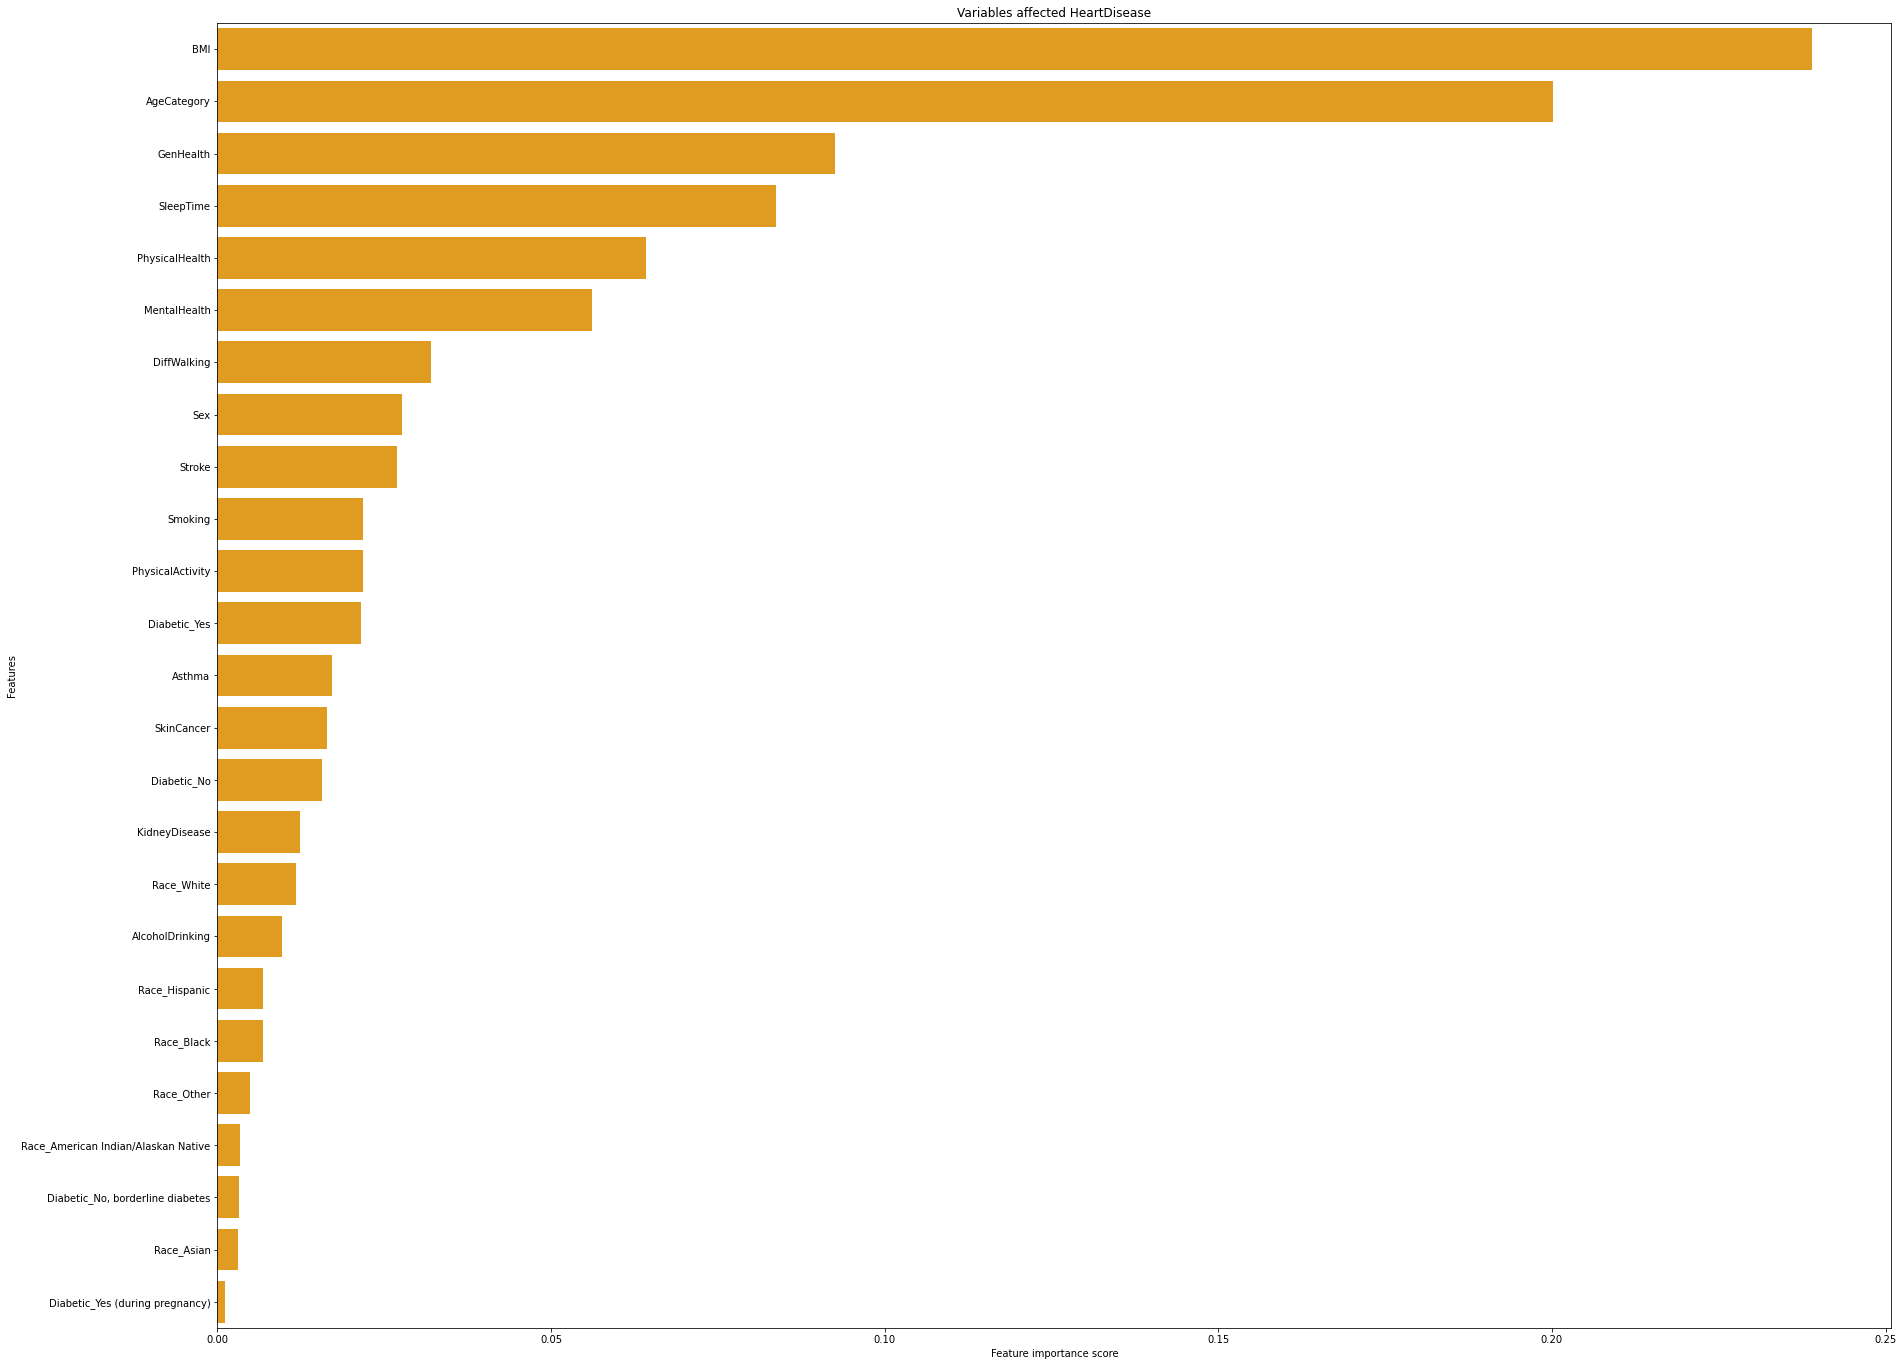

In [74]:
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=df, color = '#ffa600')
ax.set_title("Variables affected HeartDisease")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#Conclusion
1. Undersampling data is the suitable method for this dataset compared with Oversampling & combining sampling.
2. The highest `recall` is in logistic regression of 77% with data accuracy of 74% and Random Forest of 76.4% with data accuracy of 71%. 
3. The most influenced variable on the target (HeartDisease) are BMI, AgeCategory, GenHealth and SleepTime.